In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import matplotlib.gridspec as gridspec
import pickle5
sys.path.append( "../../data_evaluation")
import handle_dictionaries
import spikeTrainAnalysis as sta
from scipy.interpolate import griddata

from scipy.optimize import curve_fit

# generate plot from preevaluated data

Text(0.65, 0.12, "(c'')")

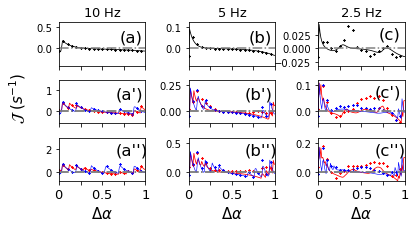

In [3]:
fig = plt.figure()

labelFontsize = 15
ticksFontsize = 13

width = 0.2
height = 0.15

x1 = 0.05
x2 = x1 + width
x3 = 0.35
x4 = x3 + width
x5 = 0.65
x6 = x5 + width

y1 = 0.05
y2 = y1 + height
y3 = 0.25
y4 = y3 + height
y5 = 0.45
y6 = y5 + height
y7 = 0.65
y8 = y7 + height

# left panels
gs_tl = gridspec.GridSpec(1, 1)
gs_tl.update(top=y8, bottom=y7, left=x1, right=x2)

gs_ctl = gridspec.GridSpec(1, 1)
gs_ctl.update(top=y6, bottom=y5, left=x1, right=x2)

gs_cbl = gridspec.GridSpec(1, 1)
gs_cbl.update(top=y4, bottom=y3, left=x1, right=x2)

gs_bl = gridspec.GridSpec(1, 1)
gs_bl.update(top=y2, bottom=y1, left=x1, right=x2)

# center panels
gs_tc = gridspec.GridSpec(1, 1)
gs_tc.update(top=y8, bottom=y7, left=x3, right=x4)

gs_ctc = gridspec.GridSpec(1, 1)
gs_ctc.update(top=y6, bottom=y5, left=x3, right=x4)

gs_cbc = gridspec.GridSpec(1, 1)
gs_cbc.update(top=y4, bottom=y3, left=x3, right=x4)

gs_bc = gridspec.GridSpec(1, 1)
gs_bc.update(top=y2, bottom=y1, left=x3, right=x4)

# right panels
gs_tr = gridspec.GridSpec(1, 1)
gs_tr.update(top=y8, bottom=y7, left=x5, right=x6)

gs_ctr = gridspec.GridSpec(1, 1)
gs_ctr.update(top=y6, bottom=y5, left=x5, right=x6)

gs_cbr = gridspec.GridSpec(1, 1)
gs_cbr.update(top=y4, bottom=y3, left=x5, right=x6)

gs_br = gridspec.GridSpec(1, 1)
gs_br.update(top=y2, bottom=y1, left=x5, right=x6)


Jmin_1, Jmax_1 = -0.4,0.6 # Hz
Jmin_2, Jmax_2 = -0.6,1.5 # Hz
Jmin_3, Jmax_3 = -0.8,3 # Hz
Jmin_4, Jmax_4 = -0.4,3.4 # Hz
color1 = 'black'
color2='red'
color3='blue'
##############################
### 10 Hz
pars = {'Astim':0.4, 'de':1.0, 'fCR_Hz':10.0, 'PpB':1, 'stimulus_type':'single', 'STDP_type':'aH', 'Jinterval':[Jmin_1, Jmax_1], 'color':color1}
ax_tl = fig.add_subplot(gs_tl[0,0])
plot_J( ax_tl , pars )

ax_ctl = fig.add_subplot(gs_ctl[0,0])
# 120 Hz intraburst frequency
pars = {'Astim':0.8, 'de':1.0, 'PpB':3, 'fintra_Hz':120.0, 'fCR_Hz':10.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_2, Jmax_2], 'color':color2}
plot_J( ax_ctl , pars )
# 60 Hz intraburst frequency
pars = {'Astim':0.8, 'de':1.0, 'PpB':3, 'fintra_Hz':60.0, 'fCR_Hz':10.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_2, Jmax_2], 'color':color3}
plot_J( ax_ctl , pars )

ax_cbl = fig.add_subplot(gs_cbl[0,0])
# 120 Hz intraburst frequency
pars = {'Astim':0.8, 'de':1.0, 'PpB':5, 'fintra_Hz':120.0, 'fCR_Hz':10.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_3, Jmax_3], 'color':color2}
plot_J( ax_cbl , pars )
# 60 Hz intraburst frequency
pars = {'Astim':0.8, 'de':1.0, 'PpB':5, 'fintra_Hz':60.0, 'fCR_Hz':10.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_3, Jmax_3], 'color':color3}
plot_J( ax_cbl , pars )

# ax_bl = fig.add_subplot(gs_bl[0,0])
# # 120 Hz intraburst frequency
# pars = {'Astim':0.8, 'de':1.0, 'PpB':8, 'fintra_Hz':120.0, 'fCR_Hz':10.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_4, Jmax_4], 'color':color2}
# plot_J( ax_bl , pars )
# # 60 Hz intraburst frequency
# pars = {'Astim':0.8, 'de':1.0, 'PpB':8, 'fintra_Hz':60.0, 'fCR_Hz':10.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_4, Jmax_4], 'color':color3}
# plot_J( ax_bl , pars )

##############################
### 5 Hz
Jmin_1, Jmax_1 = Jmin_1/5.0, Jmax_1/5.0
pars = {'Astim':0.4, 'de':1.0, 'fCR_Hz':5.0, 'PpB':1, 'stimulus_type':'single', 'STDP_type':'aH', 'Jinterval':[Jmin_1, Jmax_1], 'color':color1}
ax_tc = fig.add_subplot(gs_tc[0,0])
plot_J( ax_tc , pars )

ax_ctc = fig.add_subplot(gs_ctc[0,0])
# 120 Hz intraburst frequency
Jmin_2, Jmax_2 = Jmin_2/5.0, Jmax_2/5.0
pars = {'Astim':0.8, 'de':1.0, 'PpB':3, 'fintra_Hz':120.0, 'fCR_Hz':5.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_2, Jmax_2], 'color':color2}
plot_J( ax_ctc , pars )
# 60 Hz intraburst frequency
pars = {'Astim':0.8, 'de':1.0, 'PpB':3, 'fintra_Hz':60.0, 'fCR_Hz':5.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_2, Jmax_2], 'color':color3}
plot_J( ax_ctc , pars )

ax_cbc = fig.add_subplot(gs_cbc[0,0])
# 120 Hz intraburst frequency
Jmin_3, Jmax_3 = Jmin_3/5.0, Jmax_3/5.0
pars = {'Astim':0.8, 'de':1.0, 'PpB':5, 'fintra_Hz':120.0, 'fCR_Hz':5.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_3, Jmax_3], 'color':color2}
plot_J( ax_cbc , pars )
# 60 Hz intraburst frequency
pars = {'Astim':0.8, 'de':1.0, 'PpB':5, 'fintra_Hz':60.0, 'fCR_Hz':5.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_3, Jmax_3], 'color':color3}
plot_J( ax_cbc , pars )


# ax_bc = fig.add_subplot(gs_bc[0,0])
# # 120 Hz intraburst frequency
# Jmin_4, Jmax_4 = Jmin_4/5.0, Jmax_4/5.0
# pars = {'Astim':0.8, 'de':1.0, 'PpB':8, 'fintra_Hz':120.0, 'fCR_Hz':5.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_4, Jmax_4], 'color':color2}
# plot_J( ax_bc , pars )
# # 60 Hz intraburst frequency
# pars = {'Astim':0.8, 'de':1.0, 'PpB':8, 'fintra_Hz':60.0, 'fCR_Hz':5.0, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_4, Jmax_4], 'color':color3}
# plot_J( ax_bc , pars )

##############################
### 2.5 Hz
Jmin_1, Jmax_1 = Jmin_1/2.5, Jmax_1/2.5
pars = {'Astim':0.4, 'de':1.0, 'fCR_Hz':2.5, 'PpB':1, 'stimulus_type':'single', 'STDP_type':'aH', 'Jinterval':[Jmin_1, Jmax_1], 'color':color1}
ax_tr = fig.add_subplot(gs_tr[0,0])
plot_J( ax_tr , pars )

Jmin_2, Jmax_2 = Jmin_2/2.5,Jmax_2/2.5
pars = {'Astim':0.8, 'de':1.0, 'PpB':3, 'fintra_Hz':120.0, 'fCR_Hz':2.5, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_2, Jmax_2], 'color':color2}
ax_ctr = fig.add_subplot(gs_ctr[0,0])
plot_J( ax_ctr , pars )
# 60 Hz intraburst frequency
pars = {'Astim':0.8, 'de':1.0, 'PpB':3, 'fintra_Hz':60.0, 'fCR_Hz':2.5, 'stimulus_type':'3p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_2, Jmax_2], 'color':color3}
plot_J( ax_ctr , pars )

Jmin_3, Jmax_3 = Jmin_3/2.5,Jmax_3/2.5
pars = {'Astim':0.8, 'de':1.0, 'PpB':5, 'fintra_Hz':120.0, 'fCR_Hz':2.5, 'stimulus_type':'5p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_3, Jmax_3], 'color':color2}
ax_cbr = fig.add_subplot(gs_cbr[0,0])
plot_J( ax_cbr , pars )
# 60 Hz intraburst frequency
pars = {'Astim':0.8, 'de':1.0, 'PpB':5, 'fintra_Hz':60.0, 'fCR_Hz':2.5, 'stimulus_type':'5p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_3, Jmax_3], 'color':color3}
plot_J( ax_cbr , pars )

# Jmin_4, Jmax_4 = Jmin_4/2.5,Jmax_4/2.5
# pars = {'Astim':0.8, 'de':1.0, 'PpB':8, 'fintra_Hz':120.0, 'fCR_Hz':2.5, 'stimulus_type':'8p120', 'STDP_type':'aH', 'xi_ms':3.0, 'Jinterval':[Jmin_4, Jmax_4], 'color':color2}
# ax_br = fig.add_subplot(gs_br[0,0])
# plot_J( ax_br , pars )

### set axes ticks
# all axes
for ax in  [ax_tl, ax_ctl, ax_cbl, ax_tc, ax_ctc, ax_cbc, ax_tr, ax_ctr, ax_cbr]: # [ax_tl, ax_ctl, ax_cbl, ax_bl, ax_tc, ax_ctc, ax_cbc, ax_bc, ax_tr, ax_ctr, ax_cbr, ax_br]:
    ax.set_xticks([0,0.25,0.5,0.75,1])
    #ax.set_yticks([-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
    
    ax.set_xticklabels(['','','','',''], fontsize = ticksFontsize)
    #ax.set_yticklabels(['','','','','','','',''], fontsize = ticksFontsize)
    
# left axes 
# for ax in [ax_tl, ax_ctl, ax_cbl, ax_bl]:
#     ax.set_yticklabels(['','','$0$','','','','','$0.5$'], fontsize = ticksFontsize)
#     # ax.set_ylabel(r'$\mathcal{J}$ ($s^{-1}$)', fontsize = labelFontsize, labelpad=-5)

# bottom axes
for ax in [ax_cbl, ax_cbc, ax_cbr]: # [ax_bl, ax_bc, ax_br]:
    ax.set_xticklabels(['$0$','','$0.5$','','$1$'], fontsize = ticksFontsize)
    ax.set_xlabel(r'$\Delta \alpha$', fontsize = labelFontsize)
    
# top axes
ax_tl.set_title('$10$ Hz', fontsize = ticksFontsize )
ax_tc.set_title('$5$ Hz', fontsize = ticksFontsize )
ax_tr.set_title('$2.5$ Hz', fontsize = ticksFontsize )
    
ax_ctl.text(-0.6,-0.4,r'$\mathcal{J}$ ($s^{-1}$)', fontsize = labelFontsize, rotation=90)


panelLabelFontsize = 1.1*labelFontsize
scale = 0.1
ax_tl.text(0.7,1.5*scale,'(a)', fontsize = panelLabelFontsize)
ax_ctl.text(0.65,6*scale,'(a\')', fontsize = panelLabelFontsize)
ax_cbl.text(0.65,15*scale,'(a\'\')', fontsize = panelLabelFontsize)
#ax_bl.text(0.55,18*scale,'(a\'\'\')', fontsize = panelLabelFontsize)

scale = 0.2
ax_tc.text(0.7,0.15*scale,'(b)', fontsize = panelLabelFontsize)
ax_ctc.text(0.65,0.6*scale,'(b\')', fontsize = panelLabelFontsize)
ax_cbc.text(0.65,1.5*scale,'(b\'\')', fontsize = panelLabelFontsize)
#ax_bc.text(0.55,1.9*scale,'(b\'\'\')', fontsize = panelLabelFontsize)

scale = 0.4
ax_tr.text(0.7,0.045*scale,'(c)', fontsize = panelLabelFontsize)
ax_ctr.text(0.65,0.14*scale,'(c\')', fontsize = panelLabelFontsize)
ax_cbr.text(0.65,0.3*scale,'(c\'\')', fontsize = panelLabelFontsize)
#ax_br.text(0.55,0.4*scale,'(c\'\'\')', fontsize = panelLabelFontsize)
#, ax_ctl, ax_cbl, ax_bl, ax_tc, ax_ctc, ax_cbc, ax_bc, ax_tr, ax_ctr, ax_cbr, ax_br

# plt.savefig('Fig3.svg', bbox_inches='tight')
# plt.savefig('Fig3.png', bbox_inches='tight')
# plt.savefig('Fig3.pdf', bbox_inches='tight')
# plt.savefig('Fig3.eps', bbox_inches='tight')

# functions

In [2]:
# rate of weight change, loads precalculated weight updates from files
def JofPhi_par( phi, eta, parameterset):

    # directory from which data are loaded
    # directoryWofPhi = '/Users/jkromer/Desktop/Projects/Stanford/paper/2022/PLoS CB Shifted periodic multisite stimulation/data_evaluation/pipe_line_sim-lambda-J/data_WofPhi/'
    directoryWofPhi = 'data/'

    if parameterset['stimulus_type'] in ['3p120','5p120','8p120','3p60','5p60','8p60']:
        # load data
        if parameterset['fCR_Hz'] == 2.5: # Hz
            filename = directoryWofPhi+'normalized_phi_PLoS_intra_fCR_'+str(parameterset['fCR_Hz'])+'_fintra_'+str(parameterset['fintra_Hz'])+'_Astim_'+str(parameterset['Astim'])+'_de_'+str(parameterset['de'])+'_ppb_'+str(parameterset['PpB'])+'_full.npz'
        else:
            filename = directoryWofPhi+'normalized_phi_PLoS_intra_fCR_'+str(parameterset['fCR_Hz'])+'_fintra_'+str(parameterset['fintra_Hz'])+'_Astim_'+str(parameterset['Astim'])+'_de_'+str(parameterset['de'])+'_ppb_'+str(parameterset['PpB'])+'.npz'
            
        J_phi_data = np.load( filename )

        phi_data = J_phi_data[parameterset['STDP_type']][:,0]
        # get mean rate of weight change
        J_data = eta*parameterset['fCR_Hz']*( J_phi_data[parameterset['STDP_type']][:,1] + J_phi_data[parameterset['STDP_type']][:,2] )
 
    elif parameterset['stimulus_type'] in ['single']:
        # load data    
        filename = directoryWofPhi+'normalized_phi_PLoS_single_fCR_'+str(parameterset['fCR_Hz'])+'_Astim_'+str(parameterset['Astim'])+'_de_'+str(parameterset['de'])+'_ppb_'+str(parameterset['PpB'])+'.npz'
        J_phi_data = np.load(filename )

        phi_data = J_phi_data[parameterset['STDP_type']][:,0]
        # get mean rate of weight change
        J_data = eta*parameterset['fCR_Hz']*( J_phi_data[parameterset['STDP_type']][:,1] + J_phi_data[parameterset['STDP_type']][:,2] )
#'PLoS_normalized_phi_'+str(sys.argv[1])+'_fCR_'+str(parameterset['fCR_Hz'])+'_Astim_'+str(parameterset['Astim'])+'_de_'+str(parameterset['de'])+'_ppb_'+str(parameterset['PpB'])+'.npz'


    else:
        print('ERROR: unknown stimulus model')

    # get J for arbitrary phi using linear interpolation
    J = np.interp(phi, phi_data , J_data)

#     if pars['fCR_Hz'] == 2.5: # Hz
#         print(filename)
#         print(print(J))    
    return J

def plot_J( ax , pars ):
    
    # STDP update per spike
    eta = 0.02 # STDP prefactor
    
    # define phase values for which J is evaluated
    phi_values = np.linspace(0,1,100)
    
    # load data
    y = JofPhi_par( phi_values, eta, pars)

    if pars['color'] == 'blue':
        lwValue = 0.6
    else:
        lwValue = 0.8
    ax.plot( phi_values , y, color = pars['color'], lw=lwValue)
    ax.axhline(0, color='gray', ls='-.')
    
    if pars[ 'stimulus_type' ]  == 'single':
        J_out_filename = 'data/J_data_Est_Astim_'+str(pars['Astim'])+'_de_'+str(pars['de'])+'_PpB_'+str(pars['PpB'])+'_fCR_'+str(pars['fCR_Hz'])+'.npy'
    else:
        J_out_filename = 'data/J_data_Est_Astim_'+str(pars['Astim'])+'_de_'+str(pars['de'])+'_PpB_'+str(pars['PpB'])+'_fCR_'+str(pars['fCR_Hz'])+'_fintra_'+str(pars['fintra_Hz'])+'.npy'

    J_data = np.load( J_out_filename )
#     if pars['fCR_Hz'] == 2.5: # Hz
#         print(J_out_filename)
#         print(J_data[:,3])
    ax.scatter( J_data[:,0] , J_data[:,3], color = pars['color'], s=2.0, marker = 'x')
    
    ax.set_xlim(0,1)
    ax.set_ylim( pars['Jinterval'][0], pars['Jinterval'][1] )